# BoomBikes Case Study - Linear Regression

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Importing required libraries

In [2485]:
# Supress(importing) Warnings

import warnings
warnings.filterwarnings('ignore')

In [2486]:
# Importing all the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

from sklearn.metrics import r2_score

## Step 1: Reading and Understanding the Data

In [2487]:
# Reading the dataset
df = pd.read_csv("day.csv")

# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2488]:
# Checking the shape

df.shape

(730, 16)

In [2489]:
# Checking null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2490]:
# Checking mathematiacal distribution of the variables

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2491]:
# Dropping "instant" column as it is "record index" and not needed

df.drop("instant", axis=1 , inplace=True)

In [2492]:
# Dropping "casual" and "registrerd" columns as they both contribute to our Target variable "cnt" column

df.drop("casual", axis=1 , inplace=True)
df.drop("registered", axis=1 , inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [2493]:
# Dropping "dteday" column as it is not required as we have "mnth" and "yr" column

df.drop("dteday", axis=1 , inplace=True)

In [2494]:
df.shape

(730, 12)

In [2495]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [2496]:
# Dropping "holiday" column as well. Because 0 in "workingday" column already reflects a holiday

df.drop("holiday" , inplace=True , axis=1)
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

### Visualising Numeric Variables

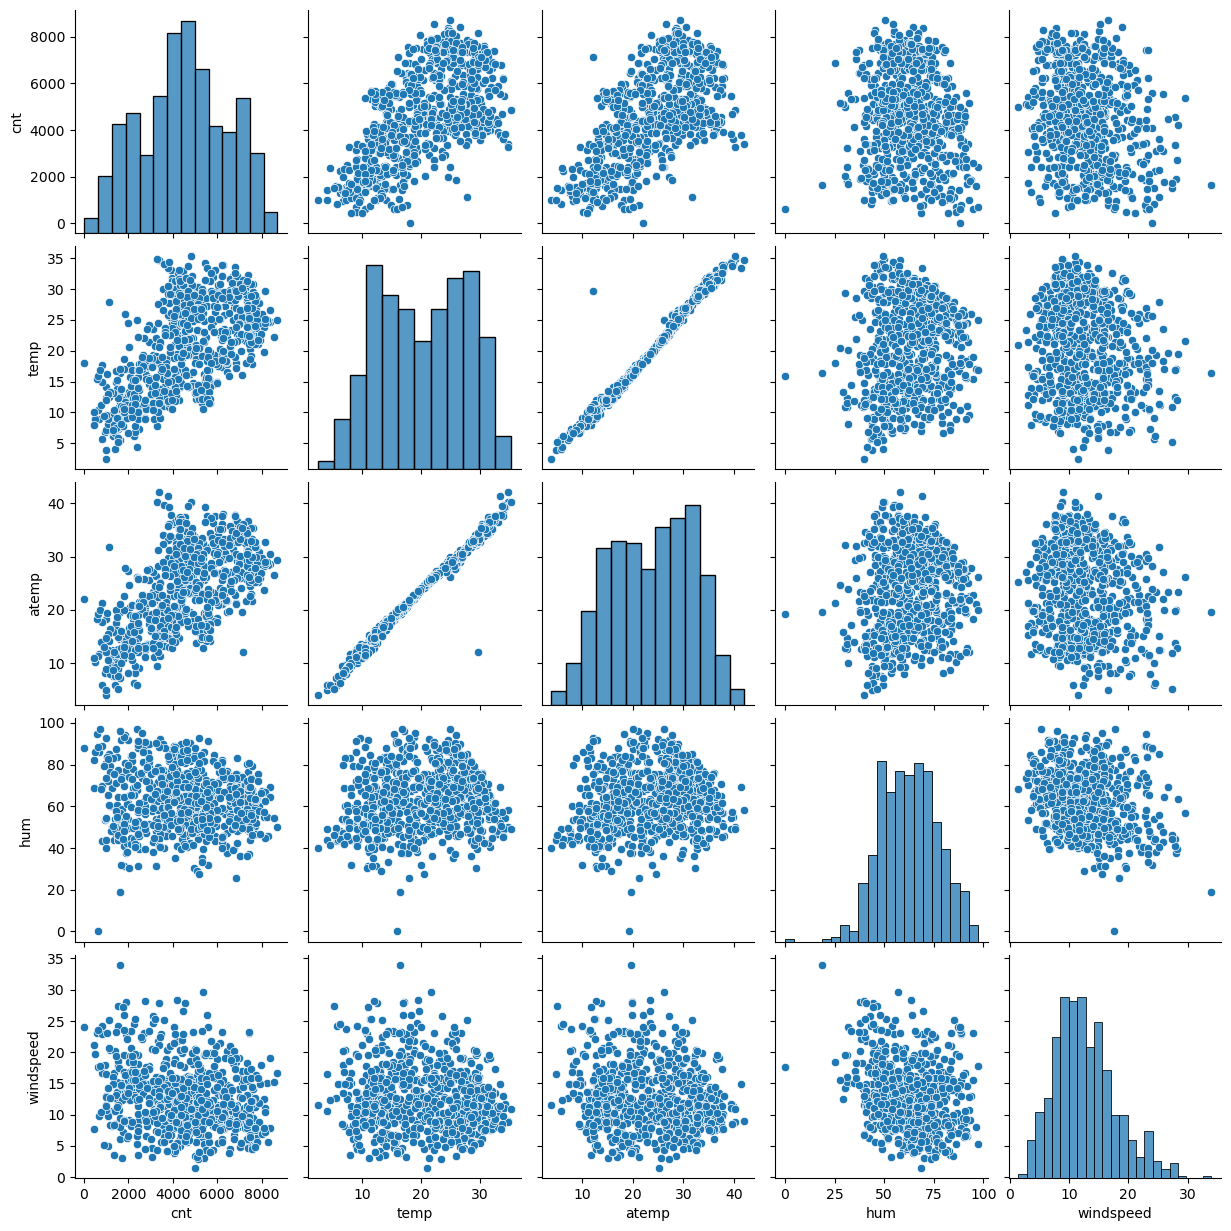

In [2497]:
# Scatter plot to identify the relationship between "cnt" and other continous variables

sns.pairplot(df[["cnt", "temp", "atemp", "hum", "windspeed"]])
plt.show()

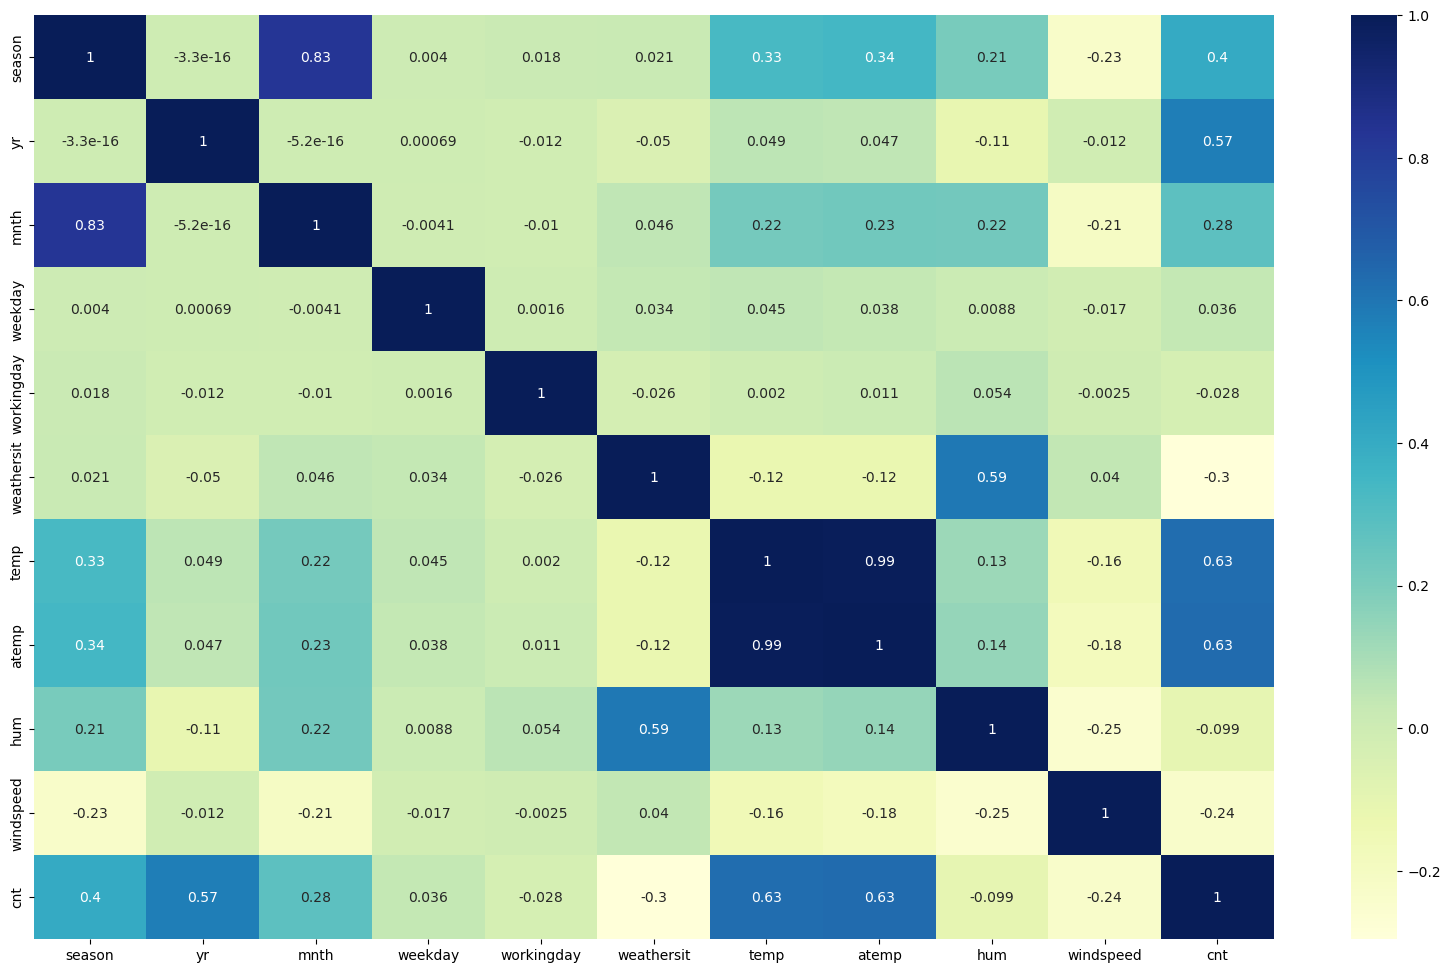

In [2498]:
# Checking the correlation between every variable

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr() , annot=True , cmap = 'YlGnBu')
plt.show()

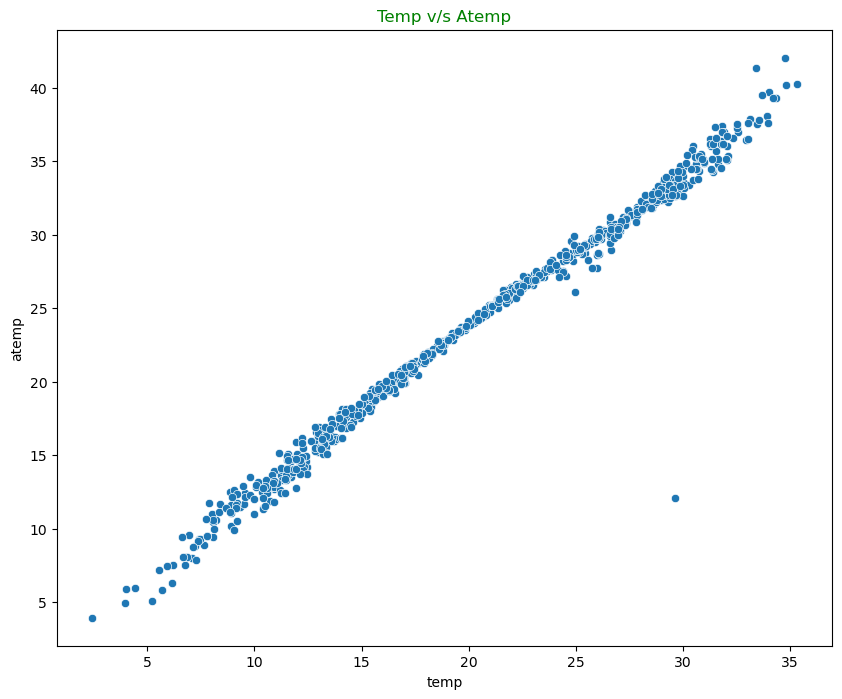

In [2499]:
# Checking the correlation between "temp" and "atemp" using scatter plot

plt.figure(figsize= [10,8])
sns.scatterplot(df.temp, df.atemp)
plt.title("Temp v/s Atemp", c = "Green")
plt.show()

### Note: It can be seen that both the variables(temp and atemp) are highly correlated. Hence one should be dropped. Else Multicollinearity may occur.

In [2500]:
# Dropping "atemp" column

df.drop("atemp" , inplace=True , axis=1)

In [2501]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,43.6957,12.522300,1600


### Visualising Categorical Variables

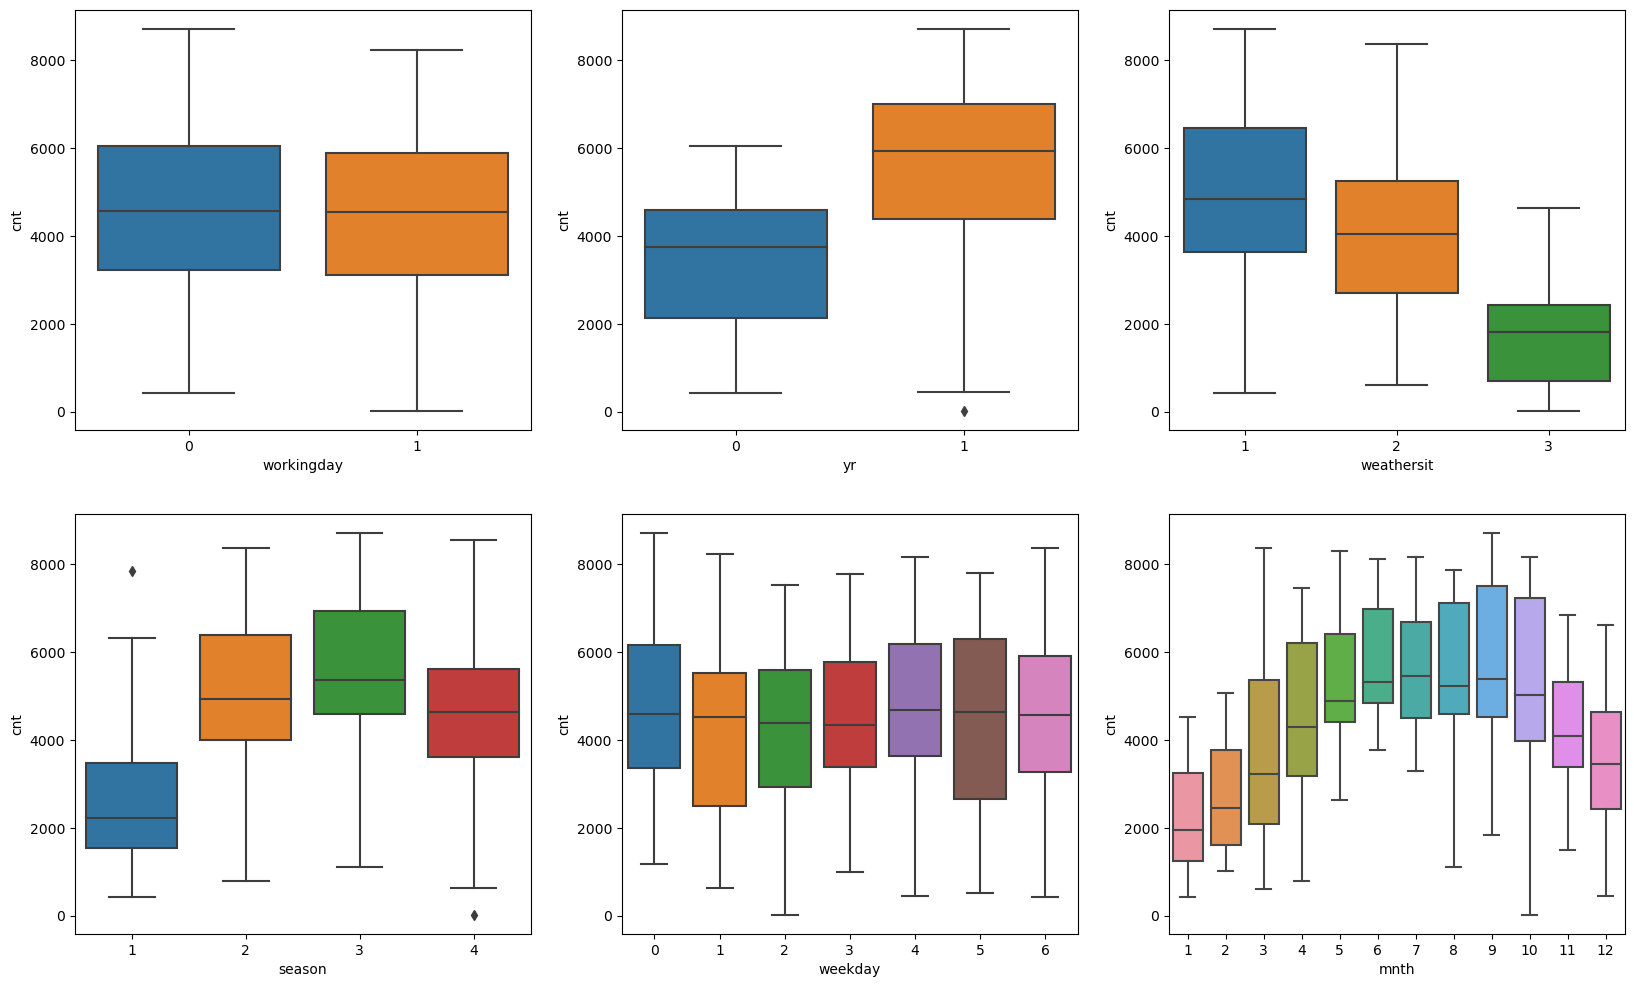

In [2502]:
# Subplotting the boxplot for categorical variables with respect to the count variable

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

### Inferences:

* There was a considerable increment in user base from 2018 to 2019
* Demand for bike is visibly low during Spring Season
* Demand for bikes is the highest in the months of August , September & October

## Step 3: Data Preparation

### Preparing the Data for modelling

* Encoding:

    * Converting Binary variable to 1/0
    * Converting Other variables to Dummy Variables

* Splitting into Test and Train

* Rescaling the variables

### Note: There are only two Binary variable i.e., "yr" and "workingday". Both of them are already in 1/0 format. Hence no need for Binary variable conversion.

In [2503]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,43.6957,12.522300,1600


### Mapping Categorical values with respective values

In [2504]:
# Mapping "season" Column

season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
df['season'] = df['season'].map(season_map)

# Mapping "mnth" Column

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr' , 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df.mnth = df.mnth.map(month_map)

# Mapping "weekday" Column

week_map = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday' , 5:'Friday', 6:'Saturday', 7:'Sunday'}
df.weekday = df.weekday.map(week_map)

# Mapping "weathersit" Column

weather_map = {1:'Clear', 2:'Mist', 3:'Light_rain_snow', 4:'Heavy_rain_snow'}
df.weathersit = df.weathersit.map(weather_map)

df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### Creating Dummy Variables

In [2505]:
# Creating Dummy for "season" column

season_dummy = pd.get_dummies(df['season'], drop_first = True)
season_dummy.sample(5)

,Spring,Summer,Winter
194,0,0,0
530,0,1,0
661,0,0,1
313,0,0,1
211,0,0,0


In [2506]:
# Creating Dummy for "mnth" column

month_dummy = pd.get_dummies(df['mnth'], drop_first = True)
month_dummy.sample(5)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
155,0,0,0,0,0,1,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,1,0
268,0,0,0,0,0,0,0,0,0,0,1
503,0,0,0,0,0,0,0,1,0,0,0
491,0,0,0,0,0,0,0,1,0,0,0


In [2507]:
# Creating Dummy for "weekday" column

week_dummy = pd.get_dummies(df['weekday'], drop_first = True)
week_dummy.sample(5)

,Monday,Saturday,Thursday,Tuesday,Wednesday
117,0,1,0,0,0
714,1,0,0,0,0
698,0,1,0,0,0
139,0,0,0,0,0
195,0,0,0,0,0


In [2508]:
# Creating Dummy for "weathersit" column

weather_dummy = pd.get_dummies(df['weathersit'], drop_first = True)
weather_dummy.sample(5)

,Light_rain_snow,Mist
115,0,0
607,0,0
597,0,0
212,0,0
32,0,1


In [2509]:
# Concatenation Dummy variable df's to original df

df = pd.concat([df, season_dummy], axis=1)

df = pd.concat([df, month_dummy], axis=1)

df = pd.concat([df, week_dummy], axis=1)

df = pd.concat([df, weather_dummy], axis=1)

df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
0,Spring,0,Jan,Monday,1,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2510]:
pd.set_option('display.max_columns' , 100)

In [2511]:
# Dropping original columns after dummy creation

df.drop(["season", "mnth", "weekday", "weathersit"], inplace=True, axis=1)

df.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2512]:
# Checking the info about the new dataframe after dummies addition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   workingday       730 non-null    int64  
 2   temp             730 non-null    float64
 3   hum              730 non-null    float64
 4   windspeed        730 non-null    float64
 5   cnt              730 non-null    int64  
 6   Spring           730 non-null    uint8  
 7   Summer           730 non-null    uint8  
 8   Winter           730 non-null    uint8  
 9   Aug              730 non-null    uint8  
 10  Dec              730 non-null    uint8  
 11  Feb              730 non-null    uint8  
 12  Jan              730 non-null    uint8  
 13  Jul              730 non-null    uint8  
 14  Jun              730 non-null    uint8  
 15  Mar              730 non-null    uint8  
 16  May              730 non-null    uint8  
 17  Nov             

## Step 4: Splitting the Data into Training and Testing Sets

In [2513]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 27)
(219, 27)


### Rescaling the Features (Scaling the Training dataset)

In [2514]:
# Instantiating an object
scaler = MinMaxScaler()

In [2515]:
# Create a lits of only numerical variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Fit the scaler on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [2516]:
df_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


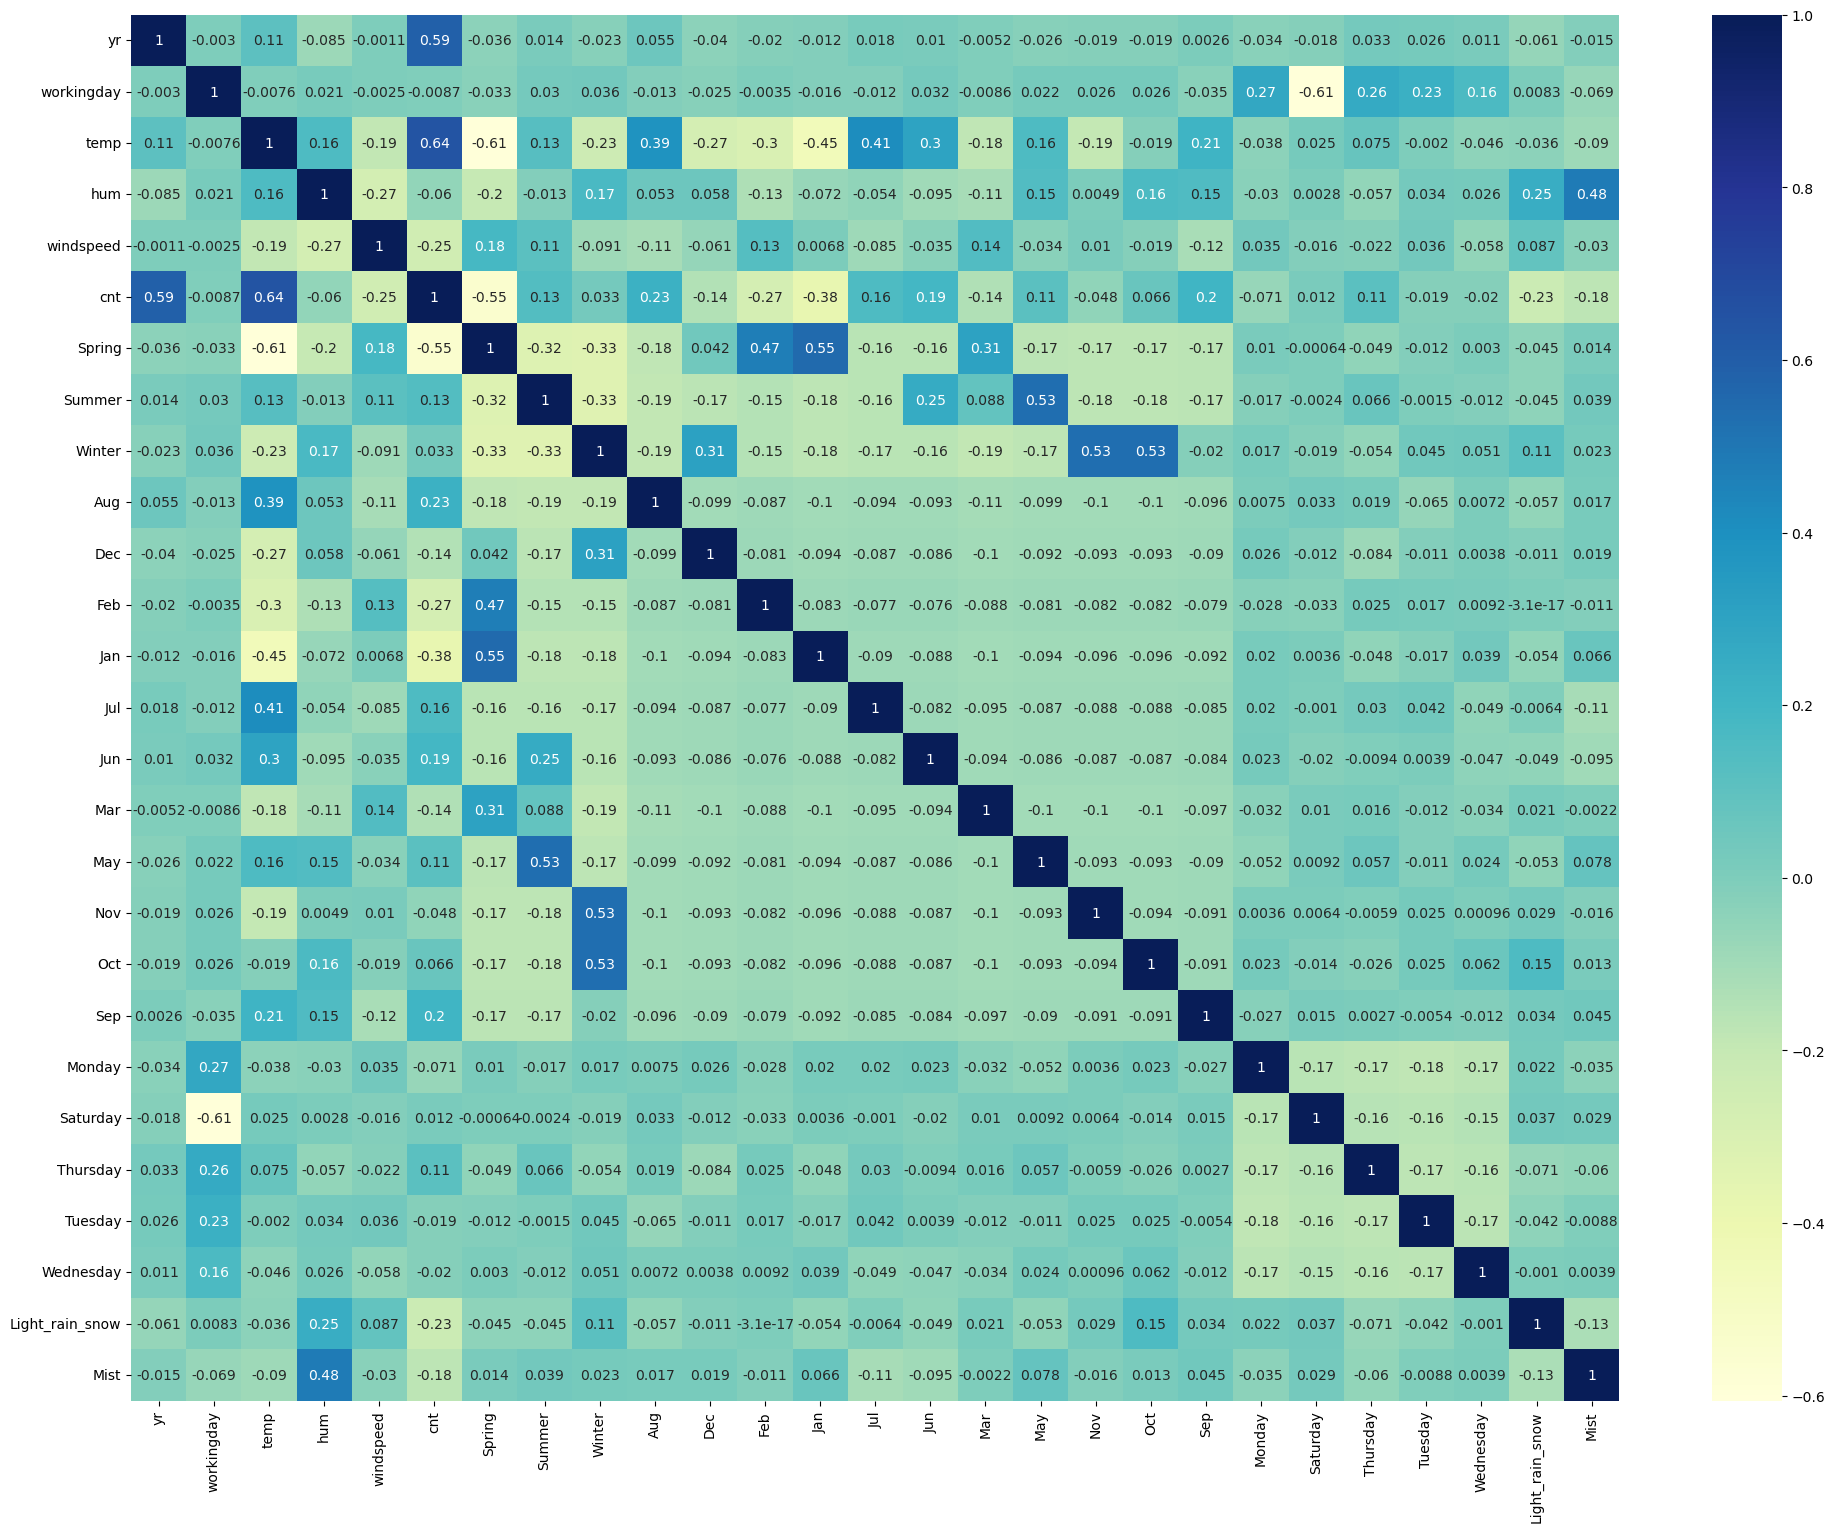

In [2517]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24,18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we see temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.

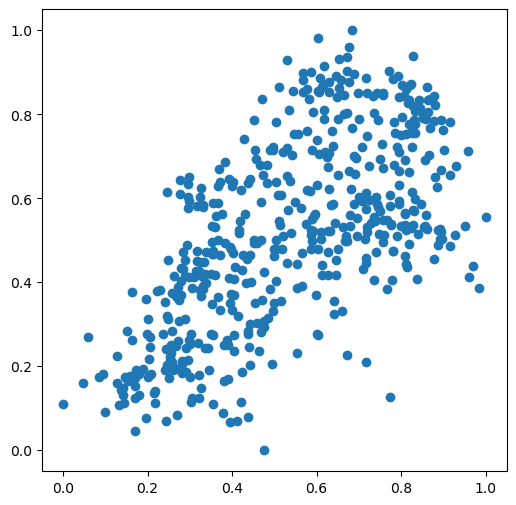

In [2518]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

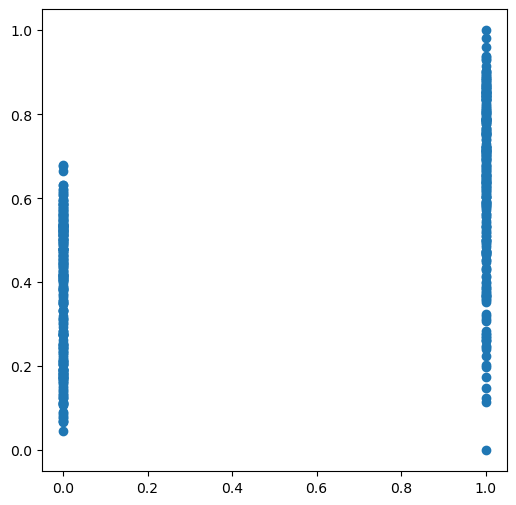

In [2519]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.yr, df_train.cnt)
plt.show()

So, we pick temp as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [2520]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [2521]:
X_train

,yr,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
653,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
578,1,1,0.863973,0.679690,0.187140,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,0,1,0.248216,0.577930,0.431816,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. We need to explicitly fit a constant because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [2522]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model = lr.fit()

In [2523]:
# Check the parameters obtained

lr_model.params

const    0.169798
temp     0.639952
dtype: float64

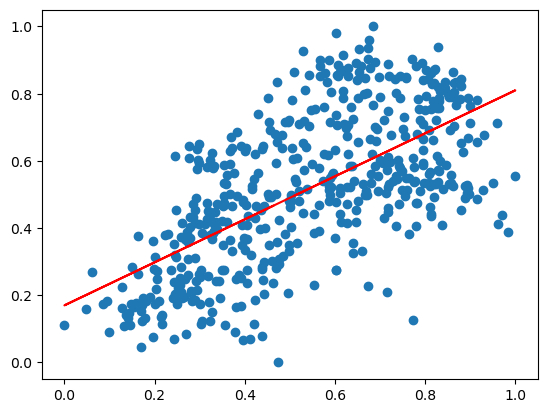

In [2524]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [2525]:
# Print a summary of the linear regression model obtained
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 02 May 2023   Prob (F-statistic):           5.80e-61
Time:                        16:07:33   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [2526]:
# Add another variable yr
X_train_lm = X_train[['temp', 'yr']]

In [2527]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_1 = lr.fit()

# Check the parameters obtained
lr_model_1.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [2528]:
# Check the summary
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          9.25e-130
Time:                        16:07:33   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.689` from `0.413`.
Let's go ahead and add other variables as well.

In [2529]:
# Add another variable Jul
X_train_lm = X_train[['temp', 'yr', 'Jul']]

In [2530]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_2 = lr.fit()

# Check the parameters obtained
lr_model_2.params

const    0.062301
temp     0.630823
yr       0.235827
Jul     -0.096266
dtype: float64

In [2531]:
# Check the summary
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     395.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.26e-132
Time:                        16:07:33   Log-Likelihood:                 346.40
No. Observations:                 510   AIC:                            -684.8
Df Residuals:                     506   BIC:                            -667.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0623      0.015      4.088      0.0

In [2532]:
# Add another variable hum
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum']]

In [2533]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_3 = lr.fit()

# Check the parameters obtained
lr_model_3.params

const    0.178126
temp     0.659482
yr       0.229761
Jul     -0.111900
hum     -0.195191
dtype: float64

In [2534]:
# Check the summary
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     318.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.32e-136
Time:                        16:07:33   Log-Likelihood:                 359.74
No. Observations:                 510   AIC:                            -709.5
Df Residuals:                     505   BIC:                            -688.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1781      0.027      6.659      0.0

In [2535]:
# Add another variable windspeed
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed']]

In [2536]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_4 = lr.fit()

# Check the summary
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     302.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.82e-149
Time:                        16:07:33   Log-Likelihood:                 391.76
No. Observations:                 510   AIC:                            -771.5
Df Residuals:                     504   BIC:                            -746.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3220      0.031     10.507      0.0

In [2537]:
# Add another variable Spring
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed', 'Spring']]

In [2538]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_5 = lr.fit()

# Check the summary
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     325.8
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.09e-169
Time:                        16:07:33   Log-Likelihood:                 443.03
No. Observations:                 510   AIC:                            -872.1
Df Residuals:                     503   BIC:                            -842.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4621      0.031     15.032      0.0

In [2539]:
# Add another variable Winter
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed', 'Spring', 'Winter']]

In [2540]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_6 = lr.fit()

# Check the summary
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     290.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.84e-172
Time:                        16:07:33   Log-Likelihood:                 451.77
No. Observations:                 510   AIC:                            -887.5
Df Residuals:                     502   BIC:                            -853.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4088      0.033     12.453      0.0

In [2541]:
# Add another variable Mist
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed', 'Spring', 'Winter', 'Mist']]

In [2542]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_7 = lr.fit()

# Check the summary
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.8
Date:                Tue, 02 May 2023   Prob (F-statistic):          7.63e-172
Time:                        16:07:33   Log-Likelihood:                 454.01
No. Observations:                 510   AIC:                            -890.0
Df Residuals:                     501   BIC:                            -851.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3960      0.033     11.900      0.0

In [2543]:
# Add another variable Light_rain_snow
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed', 'Spring', 'Winter', 'Mist', 'Light_rain_snow']]

In [2544]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_8 = lr.fit()

# Check the summary
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     270.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.06e-185
Time:                        16:07:33   Log-Likelihood:                 489.53
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     500   BIC:                            -916.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3308      0.032     

In [2545]:
# Add another variable Sep
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed', 'Spring', 'Winter', 'Mist', 'Light_rain_snow', 'Sep']]

In [2546]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_9 = lr.fit()

# Check the summary
print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.80e-187
Time:                        16:07:33   Log-Likelihood:                 496.15
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     499   BIC:                            -923.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3359      0.032     

In [2547]:
# Add another variable Mar
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed', 'Spring', 'Winter', 'Mist', 'Light_rain_snow', 'Sep', 'Mar']]

In [2548]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_10 = lr.fit()

# Check the summary
print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.58e-187
Time:                        16:07:33   Log-Likelihood:                 499.61
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     498   BIC:                            -924.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3311      0.031     

In [2549]:
# Add another variable Oct
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed', 'Spring', 'Winter', 'Mist', 'Light_rain_snow', 'Sep', 'Mar', 'Oct']]

In [2550]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_11 = lr.fit()

# Check the summary
print(lr_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.72e-187
Time:                        16:07:34   Log-Likelihood:                 502.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     497   BIC:                            -923.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3441      0.032     

In [2551]:
# Add another variable May
X_train_lm = X_train[['temp', 'yr', 'Jul', 'hum', 'windspeed', 'Spring', 'Winter', 'Mist', 'Light_rain_snow', 'Sep', 'Mar', 'Oct', 'May']]

In [2552]:
# Build a linear model

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_12 = lr.fit()

# Check the summary
print(lr_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.50e-188
Time:                        16:07:34   Log-Likelihood:                 506.52
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     496   BIC:                            -925.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3422      0.032     

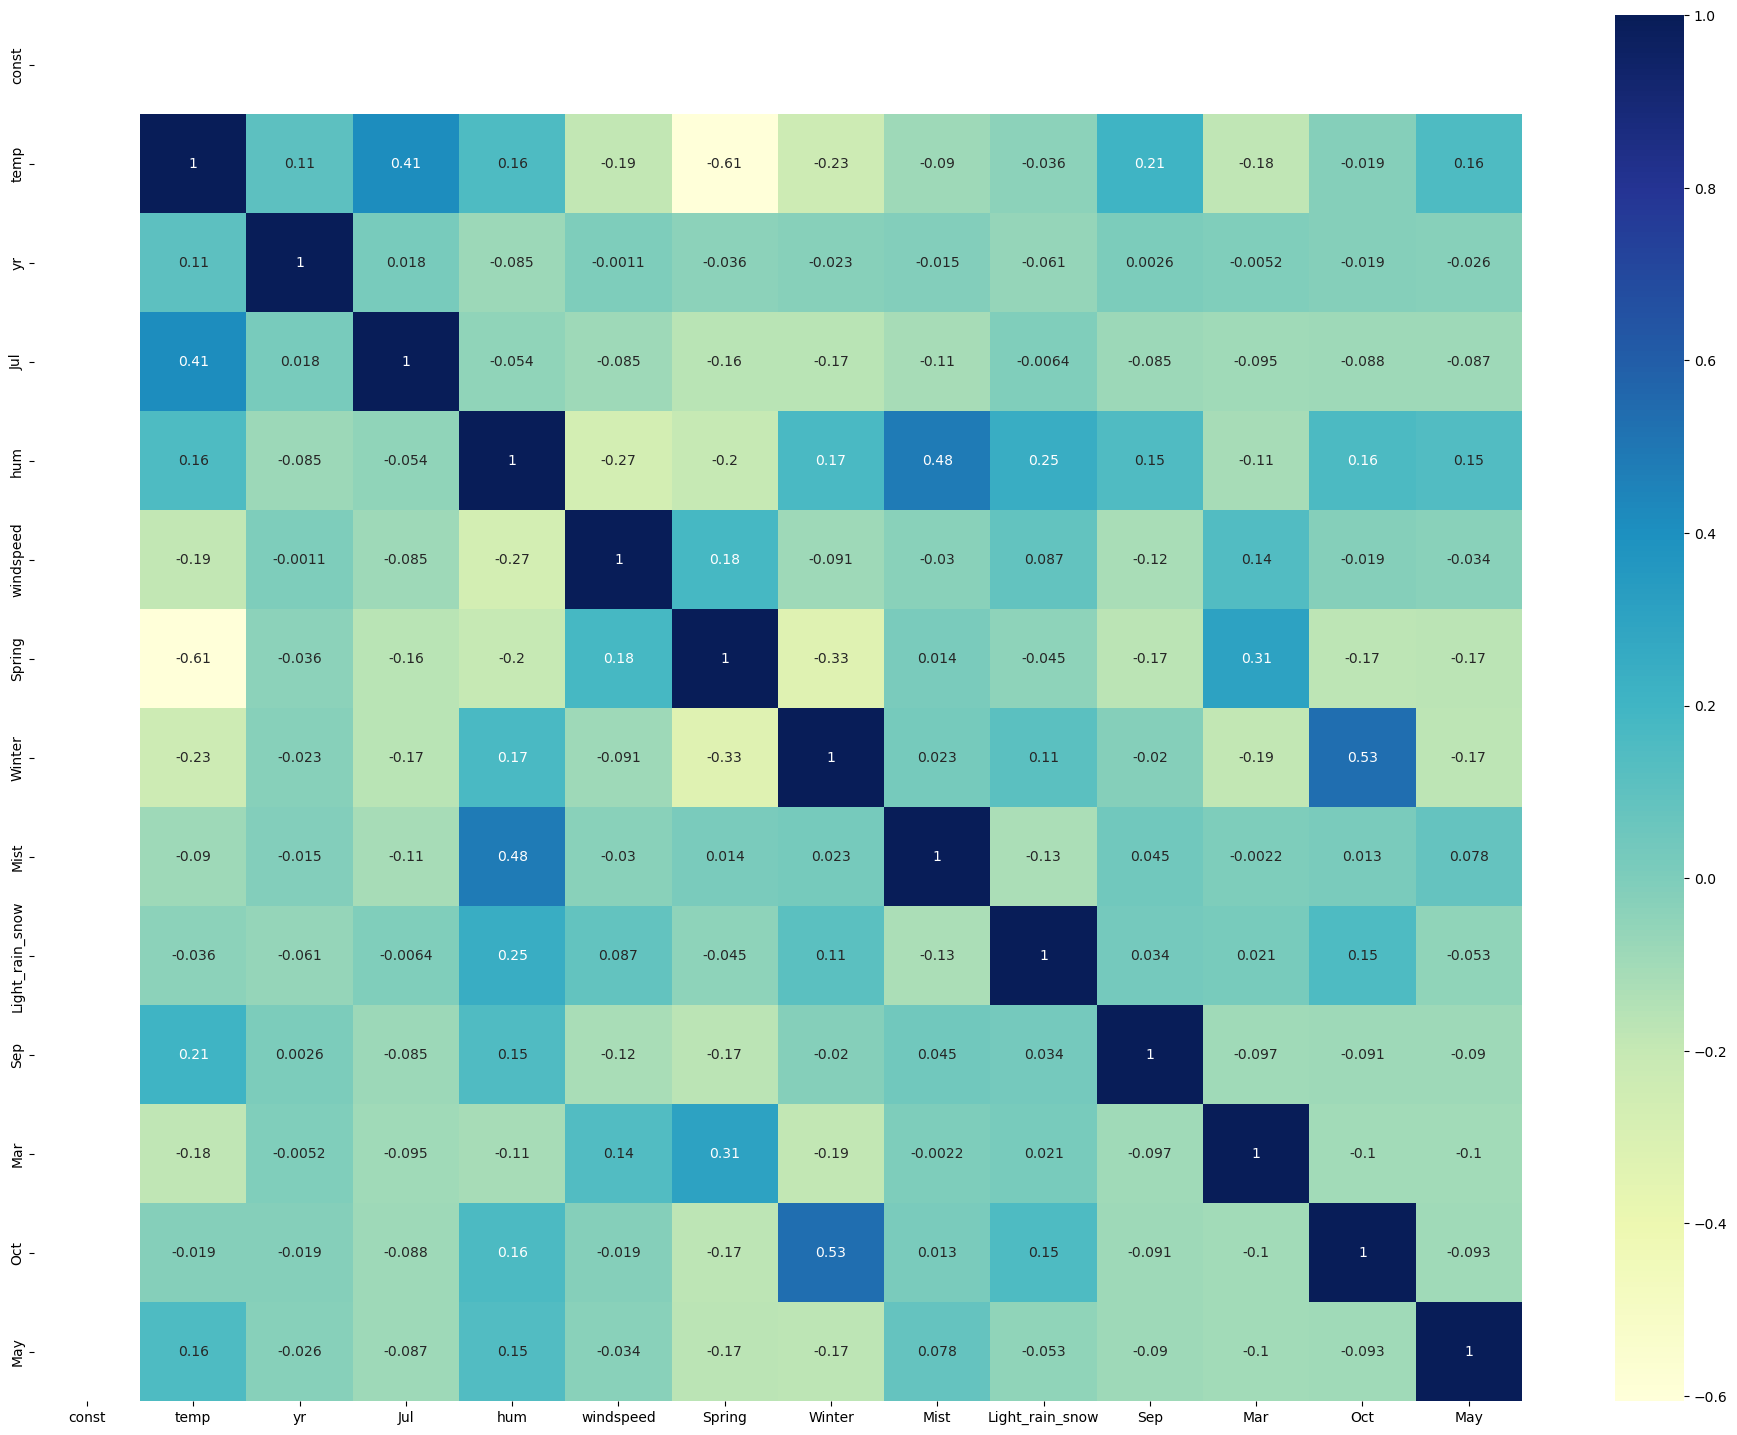

In [2553]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24,18))
sns.heatmap(X_train_lm.corr(), annot = True, cmap="YlGnBu")
plt.show()

We generally want a VIF that is less than 5 and p values is less than 0.05. So there are clearly some variables we need to drop.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [2554]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.81
1,temp,3.15
6,Spring,2.79
7,Winter,2.58
4,hum,1.93
8,Mist,1.56
12,Oct,1.52
3,Jul,1.36
9,Light_rain_snow,1.26
13,May,1.23


### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF of `23.82`. Let's go ahead and drop this variable

In [2555]:
# Dropping highly correlated variables and insignificant variables

X_train_lm = X_train_lm.drop('hum', 1,)

In [2556]:
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Build a second model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_13 = lr.fit()

# Print the summary of the model
print(lr_model_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          8.01e-185
Time:                        16:07:35   Log-Likelihood:                 496.01
No. Observations:                 510   AIC:                            -966.0
Df Residuals:                     497   BIC:                            -911.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2497      0.025     

In [2557]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.44
1,temp,3.00
5,Spring,2.76
6,Winter,2.50
11,Oct,1.52
3,Jul,1.35
12,May,1.20
9,Sep,1.17
10,Mar,1.15
4,windspeed,1.09


In [2558]:
# Dropping highly correlated variables and insignificant variables
X_train_lm = X_train_lm.drop('May', 1,)

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Build a second model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_14 = lr.fit()

# Print the summary of the model
print(lr_model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.98e-185
Time:                        16:07:35   Log-Likelihood:                 493.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     498   BIC:                            -912.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2581      0.025     

In [2559]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.52
1,temp,3.00
5,Spring,2.65
6,Winter,2.37
11,Oct,1.52
3,Jul,1.30
9,Sep,1.13
10,Mar,1.13
4,windspeed,1.09
8,Light_rain_snow,1.07


In [2560]:
# Dropping highly correlated variables and insignificant variables
X_train_lm = X_train_lm.drop('Winter', 1,)

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Build a second model
lr = sm.OLS(y_train, X_train_lm)

# Fit model
lr_model_15 = lr.fit()

# Print the summary of the model
print(lr_model_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.23e-185
Time:                        16:07:35   Log-Likelihood:                 491.28
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     499   BIC:                            -914.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2917      0.019     

In [2561]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.39
1,temp,2.04
5,Spring,1.81
3,Jul,1.30
9,Mar,1.13
8,Sep,1.12
10,Oct,1.11
4,windspeed,1.07
7,Light_rain_snow,1.07
6,Mist,1.04


Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [2562]:
y_train_pred = lr_model_15.predict(X_train_lm)

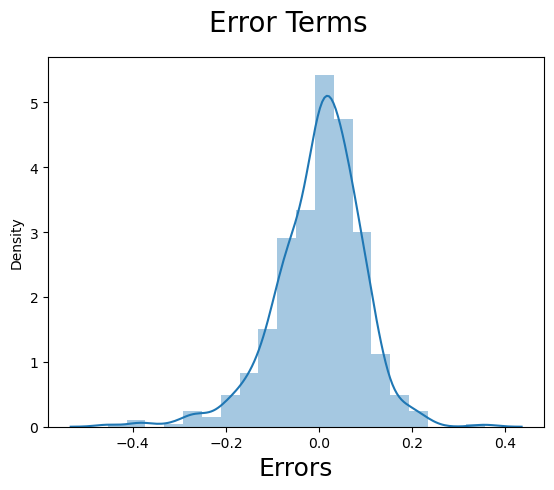

In [2563]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

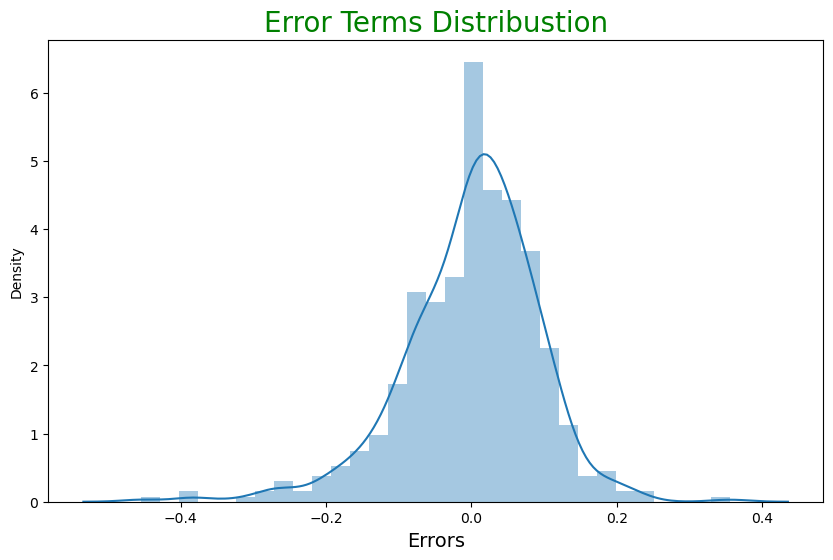

In [2564]:
plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_pred), norm_hist=True)
plt.xlabel('Errors', fontsize = 14)  
plt.title('Error Terms Distribustion',fontdict={'fontsize' : 20 , 'color' : "Green" }) 
plt.show()

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [2565]:
df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
184,0,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
221,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [2566]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [2567]:
df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
184,0,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [2568]:
df_test.describe()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


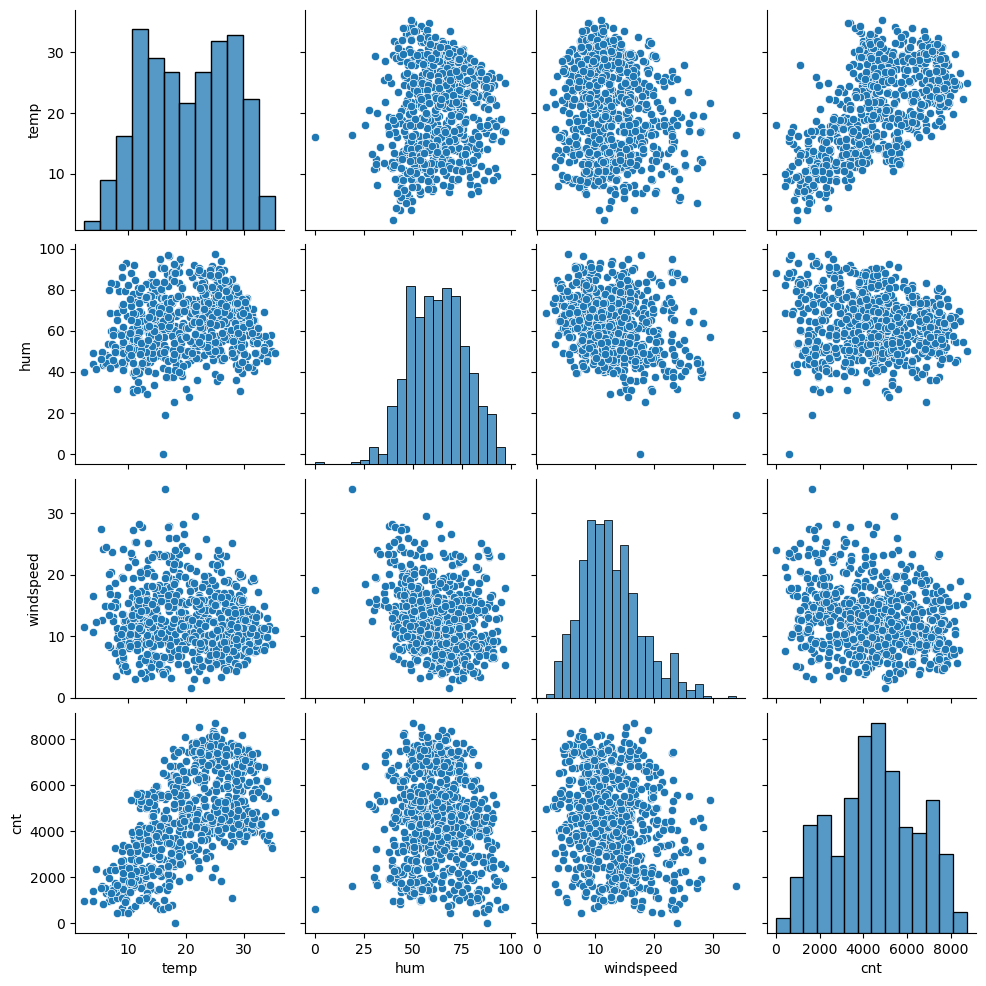

In [2569]:
# Scatter plot to identify the relationship between "cnt" and other continous variables

sns.pairplot(df[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()

### Dividing into X_test and y_test

In [2570]:
y_test = df_test.pop('cnt')
X_test = df_test

In [2571]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   workingday       219 non-null    int64  
 2   temp             219 non-null    float64
 3   hum              219 non-null    float64
 4   windspeed        219 non-null    float64
 5   Spring           219 non-null    uint8  
 6   Summer           219 non-null    uint8  
 7   Winter           219 non-null    uint8  
 8   Aug              219 non-null    uint8  
 9   Dec              219 non-null    uint8  
 10  Feb              219 non-null    uint8  
 11  Jan              219 non-null    uint8  
 12  Jul              219 non-null    uint8  
 13  Jun              219 non-null    uint8  
 14  Mar              219 non-null    uint8  
 15  May              219 non-null    uint8  
 16  Nov              219 non-null    uint8  
 17  Oct            

In [2572]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [2573]:
X_test_lm.head()

,const,yr,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1.0,1,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [2574]:
# Creating X_test_lm dataframe by dropping variables from X_test
X_test_lm = X_test_lm[X_train_lm.columns]

In [2575]:
# Making predictions using the final model

y_pred_lm = lr_model_15.predict(X_test_lm)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

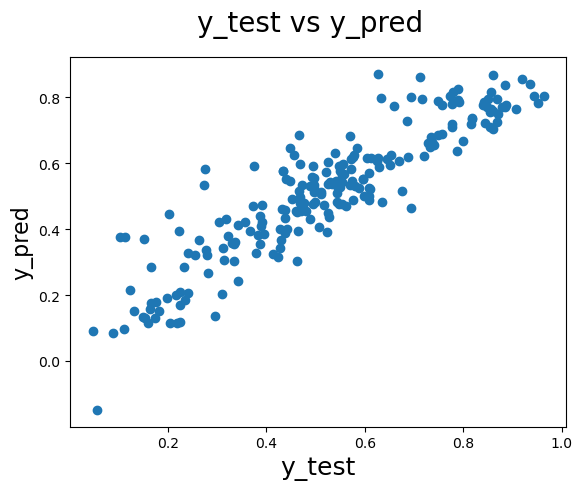

In [2576]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [2577]:
# Calculating the R-squarred value of the predictions

r2 = r2_score(y_true= y_test , y_pred= y_pred_lm)
r2

0.8171895592265701

In [2578]:
# Adjusted R-squared value for the final model on test set

Adj_r2 = 1-(1-r2)*((df_test.shape[0]-1)/(df_test.shape[0]-10-1))
print(Adj_r2)

0.8084005957278475


### The R-Squared predicted by the model on TEST SET 81.72% is very closed to R squared calculated by the model on TRAIN SET 83.10%
### The Adjusted R-squared predicted by the model on TEST SET 80.84% is very closed to Adjusted R-squared calculated by the model on TRAIN SET 82.70%
### Hence we can conclude that out model is predicting the Dependent variable effectively. So the model is valid with 10 parameters namely:
- temp
- yr
- Jul
- windspeed
- Spring
- Mist
- Light_rain_snow
- Sep
- Mar
- Oct

## The equation of the best fitted line is as below:
$ Count = 0.2357×yr+0.0.3988×temp-0.1552×windspeed-0.1436×Spring-0.0638×Jul+0.0593×Oct+0.03751×Mar+0.0633×Sep-0.2912×Light_rain_snow-0.0811×Mist $